#libraries

In [106]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



#Model Performance Evaluators
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
from xgboost import XGBClassifier
from collections import Counter

# Load the standard packages for working with data

In [135]:
# T-Stage: The T refers to the size and extent of the main tumor
# N-Stage:  lymph nodes before they reach other parts of the body. 
# The N category can be assigned a letter or a number: 
# NX means there's no information about the nearby lymph nodes
#6th stage: IIA, IIB, IIIA, IIIB, IIIC
#Differentiate: Poorly differentiated, Moderately differentiated, Well differentiated
#Regional or Distant

from pandas.core.indexing import length_of_indexer
df = pd.read_csv("Breast_Cancer.csv")

df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Encoding Labels And Target


In [136]:
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
data = np.array(df)
X = data[:,0:data.shape[1]-1]
y = data[:, -1]

df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


# Unsupervised Learning

## Age

In [124]:
# the minimum age of getting  Breast-cancer?
min_age = min(df["Age"])
print("Minimum Age :", min_age)

#the maximum age of getting Breast-cancer?
max_age = max(df["Age"])
print("Maximum Age",max_age)

Minimum Age : 0
Maximum Age 39


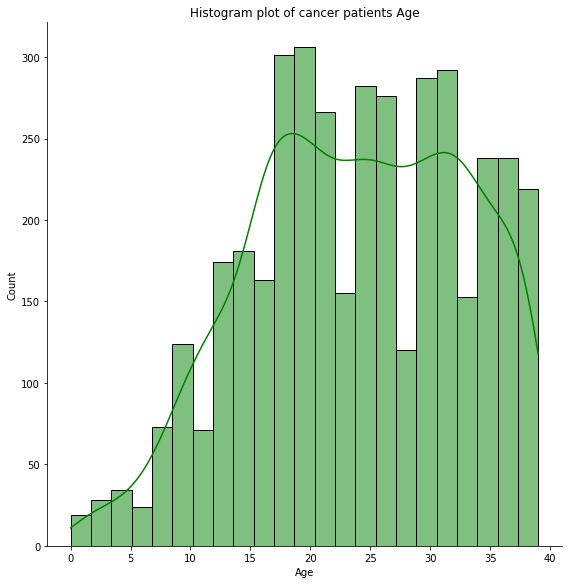

In [125]:
## Histogram Plot with Normal distribution plot
sns.displot(df["Age"], kde=True, color=("green"),height=8,aspect=1,facet_kws=None)
plt.title("Histogram plot of cancer patients Age")
plt.show()


From both Histogram plot we can say that the Age data set is not normally distributed.

## Tumor Size


In [126]:
# Minimum Tumor Size in Cancer pateints 
min_tumor_size = min(df["Tumor Size"])
print("Minimum tumor size of breast cancer:", min_tumor_size)
# Maximum Tumor Size in Cancer pateints 
max_tumor_size = max(df["Tumor Size"])
print("Maximum tumor size of breast cancer:",max_tumor_size)

Minimum tumor size of breast cancer: 0
Maximum tumor size of breast cancer: 109


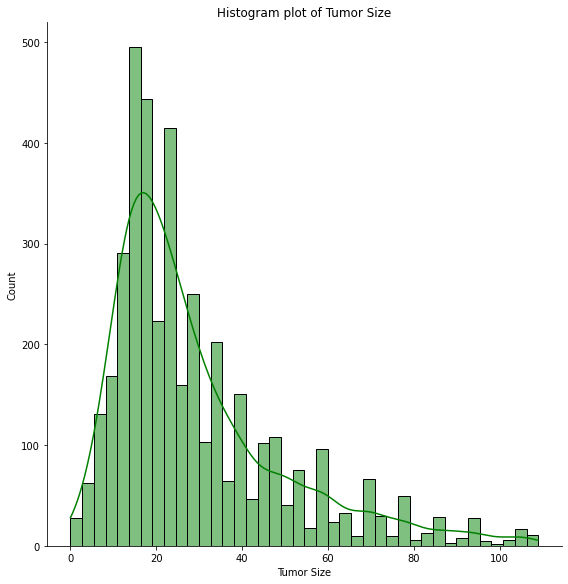

In [127]:
sns.displot(df["Tumor Size"], kde=True, color=("green"),height=8,aspect=1,facet_kws=None)
plt.title("Histogram plot of Tumor Size")
plt.show()

From the above Histogram plot we can say that the Tumor Size varies mostly between 0 to 60cm in size.From Histogram we can say that the Tumor Size data set is not normally distributed.

##Regional Node Examined (RNE)

In [128]:
# Minimum value of RNE in Cancer pateints 
min_RNE = min(df["Regional Node Examined"])
print("Minimum Regional Node Examined value:",min_RNE)
# Maximum value of RNE in Cancer pateints 
max_RNE = max(df["Regional Node Examined"])
print("Maximum Regional Node Examined value",max_RNE)

Minimum Regional Node Examined value: 0
Maximum Regional Node Examined value 53


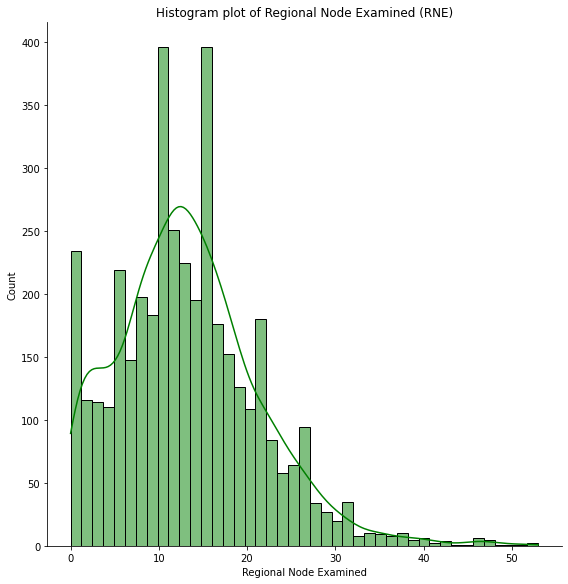

In [129]:
#Histogram  and Normal distribution plot of Regional Node Examined (RNE)
#create normal distribution histogram
sns.displot(df["Regional Node Examined"], kde=True, color=("green"),height=8,aspect=1,facet_kws=None)
plt.title("Histogram plot of Regional Node Examined (RNE)")
plt.show()


From the histogram we see that Regional Node Examined values varies mostly between 10 to 40 cm in size. From Histogram plot we can say that the Regional Node Examined (RNE) data set is not normally distributed.

## Survival Months



In [130]:
# Minimum survival_months of Cancer pateints 
min_survival_months = min(df['Survival Months'])
print("Minimimum survival months is:",min_survival_months) 
# Maximum survival_months of Cancer pateints 
max_survival_months = max(df['Survival Months'])
print("Maximum survival months is:",max_survival_months)

Minimimum survival months is: 0
Maximum survival months is: 106


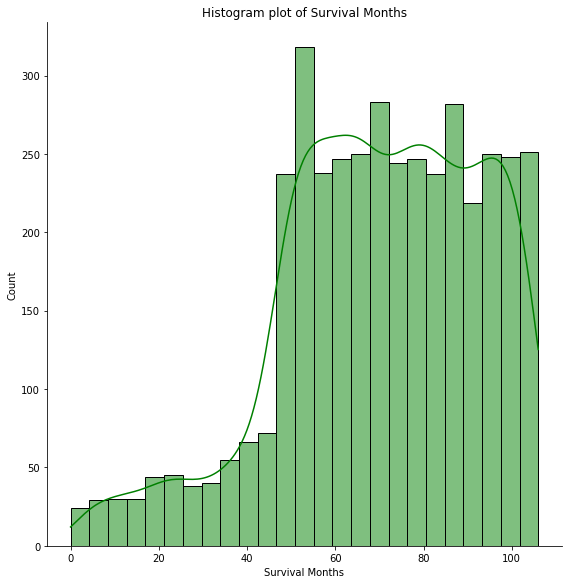

In [131]:
sns.displot(df['Survival Months'], kde=True, color=("green"),height=8,aspect=1,facet_kws=None)
plt.title("Histogram plot of Survival Months")
plt.show()

From Histogram plot we can say that the Survival Months of data set is not normally distributed



##Outliers

Checking for the outliers in Age, Tumor Size, Regional Node Positive (RNP), Regional Node Examined (RNE) and Survival Months using Box plot

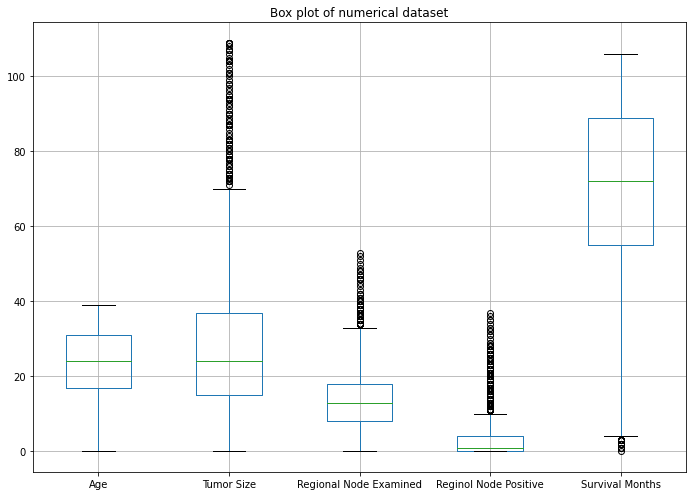

In [132]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
df = pd.DataFrame(data = df, columns = ['Age', 'Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months'])
df.boxplot()
plt.title("Box plot of numerical dataset")
plt.show()

From the above Boxplot we can see that "Tumor Size", 'Regional Node Positive (RNP)', 'Regional Node Examined (RNE)' and 'Survival Months' all having outliers.

##Data Analysis of Categorical



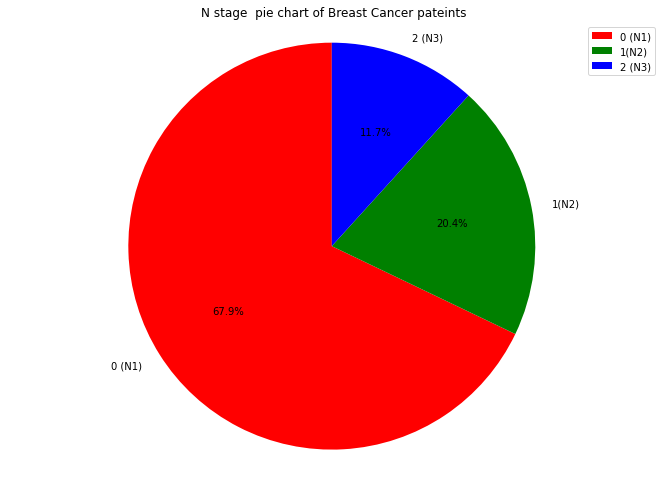

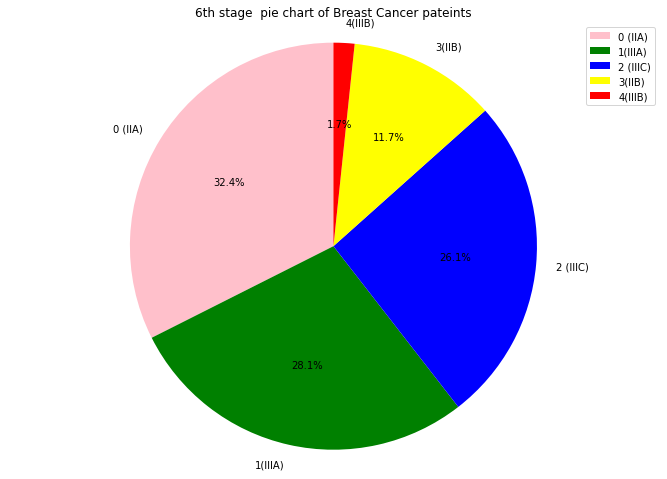

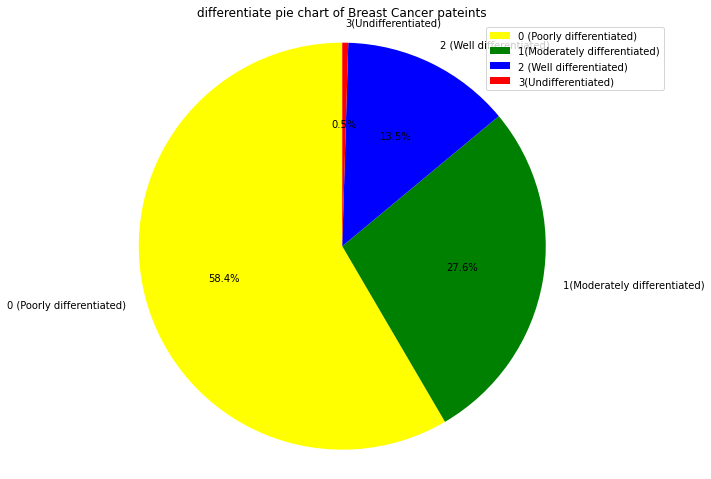

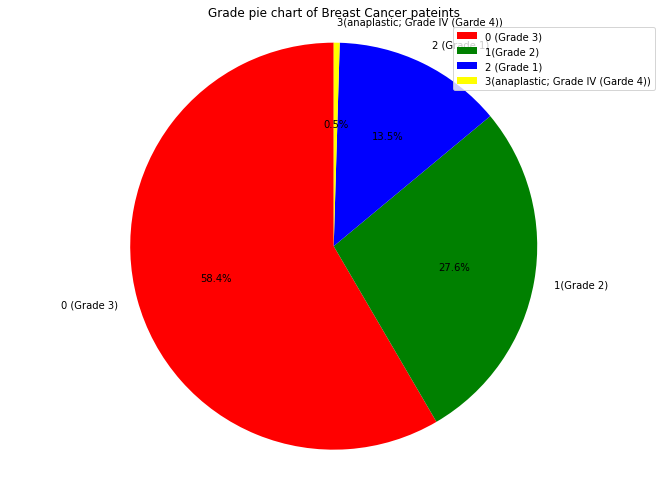

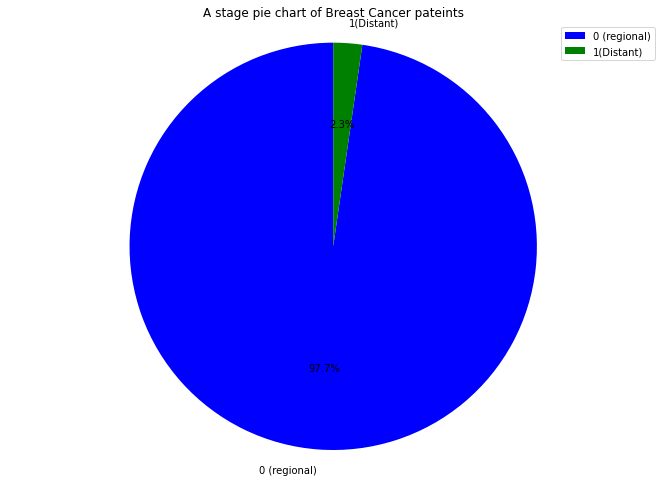

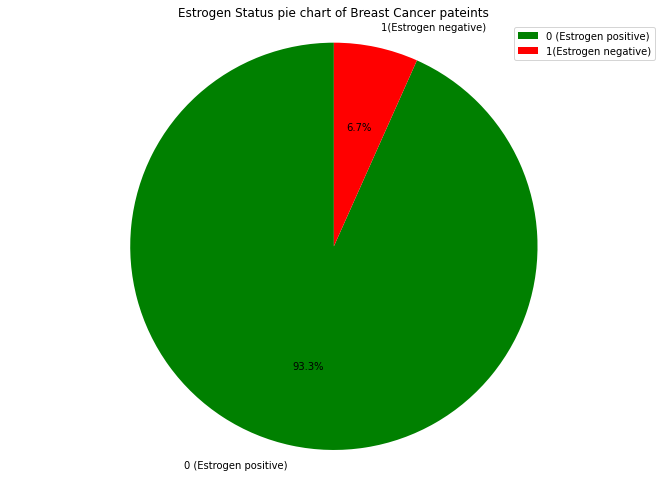

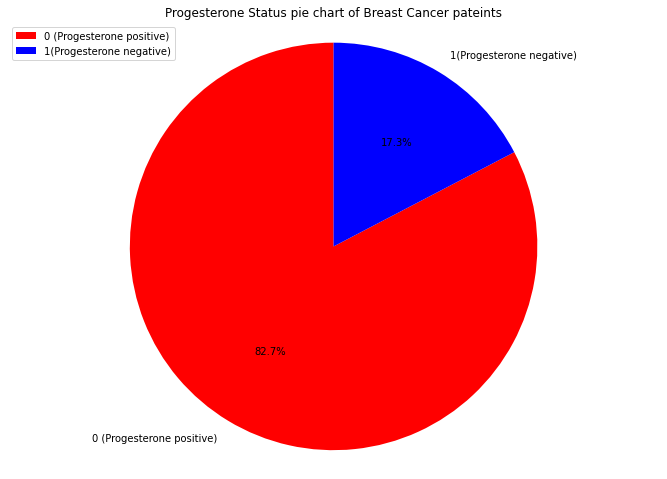

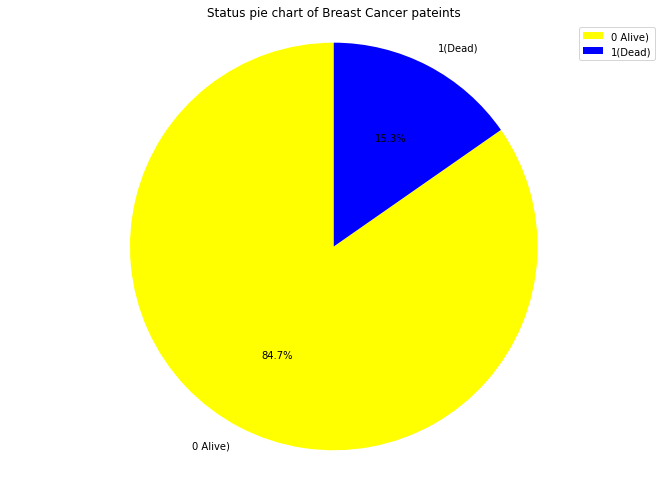

In [137]:
## Pie chart  of N Stage ##
value = df['N Stage'].value_counts()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value,labels = ('0 (N1)','1(N2)','2 (N3)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('red','green','blue'))
plt.title('N stage  pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 

## Pie chart  of 6th Stage ##
value2 = df['6th Stage'].value_counts()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value2,labels = ('0 (IIA)','1(IIIA)','2 (IIIC)','3(IIB)','4(IIIB)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('pink','green','blue','yellow','red'))
plt.title('6th stage  pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 

## Pie chart  of differentiate ##
value3 = df['differentiate'].value_counts()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value3,labels = ('0 (Poorly differentiated)','1(Moderately differentiated)','2 (Well differentiated)','3(Undifferentiated)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('Yellow','green','blue','red'))
plt.title('differentiate pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show()

# Pie chart  of Grade ##
value3 = df['Grade'].value_counts() 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value3,labels = ('0 (Grade 3)','1(Grade 2)','2 (Grade 1)','3(anaplastic; Grade IV (Garde 4))'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('red','green','blue','yellow'))
plt.title('Grade pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 



## Pie chart  of A Stage ##
value4 = df['A Stage'].value_counts() 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value4,labels = ('0 (regional)','1(Distant)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('blue','green'))
plt.title('A stage pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 

## Pie chart  of Estrogen Status  ##
a4_dims = (11.7, 8.27)
value5 = df['Estrogen Status'].value_counts() 
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value5,labels = ('0 (Estrogen positive)','1(Estrogen negative)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('green','red'))
plt.title('Estrogen Status pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 

## Pie chart  of Estrogen Status  ##
values6 = df['Progesterone Status'].value_counts()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(values6,labels = ('0 (Progesterone positive)','1(Progesterone negative)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('red','blue'))
plt.title('Progesterone Status pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 


## Pie chart of Status  ##
value7 = df['Status'].value_counts() 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value7,labels = ('0 Alive)','1(Dead)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('Yellow','blue'))
plt.title('Status pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 

## Correlation plot
The correlation plot of the whole Breast cancer dataset provides the following information.



*  Correlation of 1 The correaltion between 'differentiate' and 'Grade' is 1.


*   Correlation above 8 Correlation between 'Tumor Size' and 'T Stage' is 0.81. 'Reginoal Node Positive' an 'N Stage' is 0.84.

* Correlation between above 4 and 6. The correaltion between '6th Stage' and 'T Stage' is 0.56. The correlation between 'Progesterone Status' and 'Estrogen Status' is 0.51. The correlation between 'Reginoal Node Positive' and 'Regional Node examied' is 0.41.


* Survival Months' and 'Status' are highely negatively correlated that is the correltion between then is -0.48.




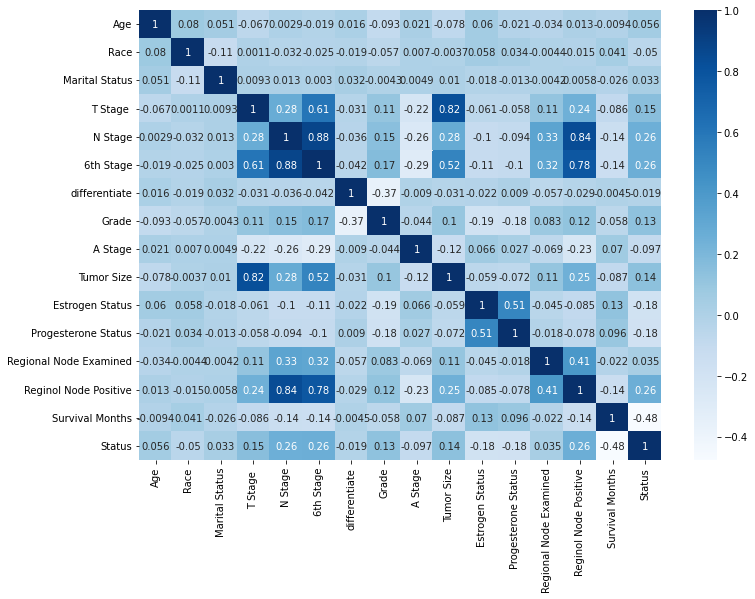

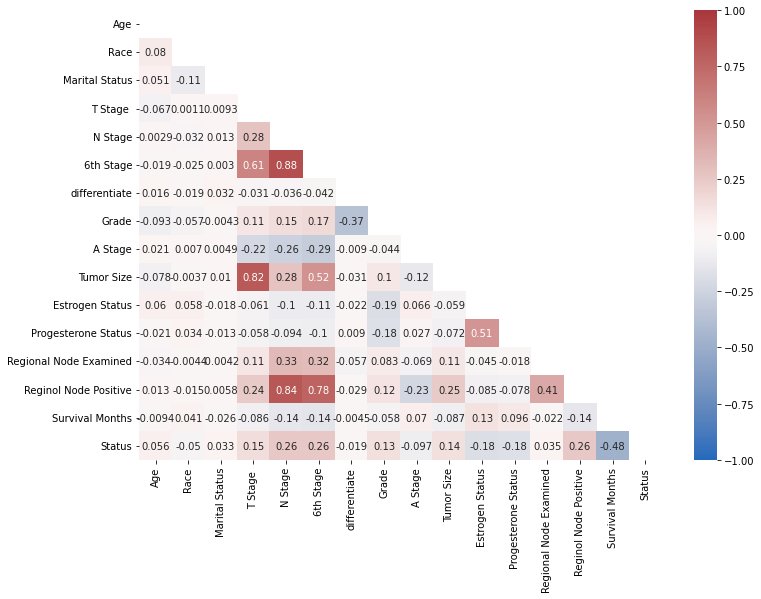

In [138]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
cormat2 = df.corr()       ## Finding correlation between every features 
#print(round(cormat,4))
#plotting the heatmap for correlation using the seaborn
sns.heatmap(cormat2, cmap="Blues",annot=True)
plt.show()
# Showing only the bottom half of our correlation matrix 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
mask = np.triu(np.ones_like(cormat2,dtype=bool))
sns.heatmap(cormat2,annot=True,vmax=1,vmin=-1,center=0,cmap='vlag',mask=mask)
plt.show()

## Split and Scale

In [139]:
#dataframe
SEED = 23

Xf = df.drop("Status", axis=1)
yf = df["Status"]

Xf_train, Xf_val, yf_train, yf_val = train_test_split(Xf, yf, test_size=0.2, shuffle=True, stratify=y, random_state=SEED)


# Array
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=SEED)
scaler = MinMaxScaler().fit(X_train)

# Data Scaling
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Principal component analysis (PCA)

A method for transforming data that makes it simple to find the dataset's most crucial characteristics for making predictions and then enables feature selection

In [140]:
pca = PCA(random_state=SEED)

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

## Unbalanced Data
### Oversampling minority class 

Because one of the most significant issues with unbalanced learning is that the minority class does not have enough instances to allow for accurate calibration, this technique gives equal weight to both classes.

### SMOTE Oversampling

Is the most used Oversampling technique because to its excellent effectiveness. It combines new instances with already existing ones. Synthetic minority oversampling approach is the term given to it.


In [141]:
sm = SMOTE(random_state=0, n_jobs=8, sampling_strategy=1.0)

#dataframe

Xf_train_resampled, yf_train_resampled = sm.fit_resample(Xf_train, yf_train)

# Array
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)
print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))

Original dataset shape: Counter({0: 2719, 1: 500})
Resampled dataset shape: Counter({0: 2719, 1: 2719})


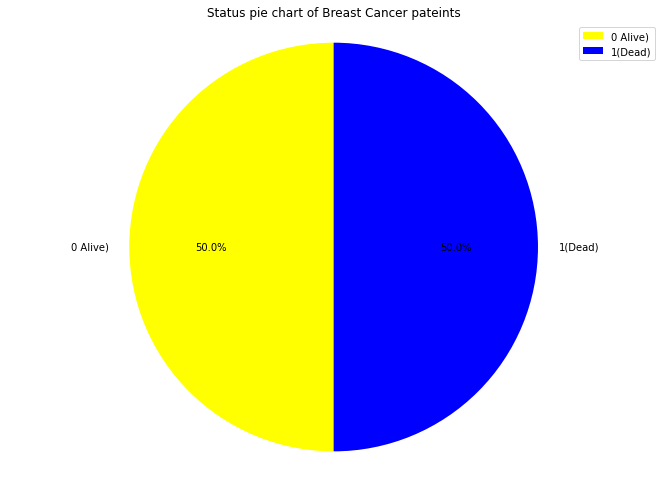

In [142]:
## Pie chart of Status  ##
value7 = yf_train_resampled.value_counts() 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.pie(value7,labels = ('0 Alive)','1(Dead)'),autopct='%1.1f%%', shadow=False, startangle=90, colors=('Yellow','blue'))
plt.title('Status pie chart of Breast Cancer pateints')
plt.axis('equal')
plt.legend()
plt.show() 

# Logistic Regression

## Without Regularization

In [143]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_hat_logreg = logreg.predict(X_train_resampled)
acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
print("Accuracy on training data = %f" % acc_logreg)
y_hat_logreg_t = logreg.predict(X_val_scaled)
acc_logreg = logreg.score(X_val_scaled, y_val)
print("Accuracy on test data = %f" % acc_logreg)

Accuracy on training data = 0.800110
Accuracy on test data = 0.808696


### Feature Transformation (X^2)

In [144]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled**2, y_train_resampled)
y_hat_logreg = logreg.predict(X_train_resampled)
acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
print("Accuracy on training data = %f" % acc_logreg)
y_hat_logreg_t = logreg.predict(X_val_scaled)
acc_logreg = logreg.score(X_val_scaled, y_val)
print("Accuracy on test data = %f" % acc_logreg)

Accuracy on training data = 0.737220
Accuracy on test data = 0.906832


### Feature Transformation (X^3)

In [145]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled**3, y_train_resampled)
y_hat_logreg = logreg.predict(X_train_resampled)
acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
print("Accuracy on training data = %f" % acc_logreg)
y_hat_logreg_t = logreg.predict(X_val_scaled)
acc_logreg = logreg.score(X_val_scaled, y_val)
print("Accuracy on test data = %f" % acc_logreg)

Accuracy on training data = 0.664950
Accuracy on test data = 0.900621


## L1 Regularization

In [146]:
C_values = np.logspace(-5,0,50)
log_train = []
log_test = []
for i in C_values:
    logreg = LogisticRegression(C=i, solver='liblinear', penalty = 'l1')
    logreg.fit(X_train_resampled, y_train_resampled)
    y_hat_logreg = logreg.predict(X_train_resampled)
    acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
    log_train.append(acc_logreg)
    y_hat_logreg_t = logreg.predict(X_val_scaled)
    acc_logreg = logreg.score(X_val_scaled, y_val)
    log_test.append(acc_logreg)

### L1 Data

In [147]:
log_train = np.array(log_train).reshape(-1,1)
log_test = np.array(log_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, log_train, log_test])
df = pd.DataFrame(table, columns =['C Values', 'Training Accuracy', 'Test Accuracy'])
print(df)

    C Values  Training Accuracy  Test Accuracy
0   0.000010           0.500000       0.855901
1   0.000013           0.500000       0.855901
2   0.000016           0.500000       0.855901
3   0.000020           0.500000       0.855901
4   0.000026           0.500000       0.855901
5   0.000032           0.500000       0.855901
6   0.000041           0.500000       0.855901
7   0.000052           0.500000       0.855901
8   0.000066           0.500000       0.855901
9   0.000083           0.500000       0.855901
10  0.000105           0.500000       0.855901
11  0.000133           0.500000       0.855901
12  0.000168           0.500000       0.855901
13  0.000212           0.500000       0.855901
14  0.000268           0.500000       0.855901
15  0.000339           0.500000       0.855901
16  0.000429           0.500000       0.855901
17  0.000543           0.500000       0.855901
18  0.000687           0.500000       0.855901
19  0.000869           0.500000       0.855901
20  0.001099 

### L1 Graph

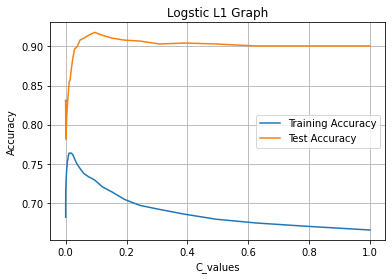

In [165]:
plt.title('Logstic L1 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### L1 Regularization with transformation (X^2)

In [166]:
C_values = np.logspace(-4,1,50)
log_train = []
log_test = []
for i in C_values:
    logreg = LogisticRegression(C=i, solver='liblinear', penalty = 'l1')
    logreg.fit(X_train_resampled**2, y_train_resampled)
    y_hat_logreg = logreg.predict(X_train_resampled)
    acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
    log_train.append(acc_logreg)
    y_hat_logreg_t = logreg.predict(X_val_scaled)
    acc_logreg = logreg.score(X_val_scaled, y_val)
    log_test.append(acc_logreg)

#### L1 ransformation (X^2) Data Display

In [169]:
log_train = np.array(log_train).reshape(-1,1)
log_test = np.array(log_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, log_train, log_test])
df = pd.DataFrame(table, columns =['C Values', 'Training Accuracy', 'Test Accuracy'])
print(df)

     C Values  Training Accuracy  Test Accuracy
0    0.000100           0.500000       0.855901
1    0.000126           0.500000       0.855901
2    0.000160           0.500000       0.855901
3    0.000202           0.500000       0.855901
4    0.000256           0.500000       0.855901
5    0.000324           0.500000       0.855901
6    0.000409           0.500000       0.855901
7    0.000518           0.500000       0.855901
8    0.000655           0.500000       0.855901
9    0.000829           0.500000       0.855901
10   0.001048           0.500000       0.855901
11   0.001326           0.500000       0.855901
12   0.001677           0.500000       0.855901
13   0.002121           0.500000       0.855901
14   0.002683           0.500000       0.855901
15   0.003393           0.632953       0.893168
16   0.004292           0.704303       0.895652
17   0.005429           0.734277       0.893168
18   0.006866           0.746782       0.899379
19   0.008685           0.748621       0

#### L1 Graph transformation (X^2)

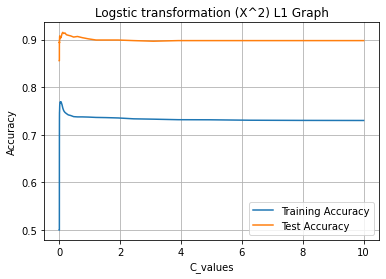

In [170]:
plt.title('Logstic transformation (X^2) L1 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### L1 Regularization with transformation (X^3)

In [171]:
C_values = np.logspace(-4,1,50)
log_train = []
log_test = []
for i in C_values:
    logreg = LogisticRegression(C=i, solver='liblinear', penalty = 'l1')
    logreg.fit(X_train_resampled**3, y_train_resampled)
    y_hat_logreg = logreg.predict(X_train_resampled)
    acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
    log_train.append(acc_logreg)
    y_hat_logreg_t = logreg.predict(X_val_scaled)
    acc_logreg = logreg.score(X_val_scaled, y_val)
    log_test.append(acc_logreg)

#### L1 ransformation (X^3) Data Display

In [172]:
log_train = np.array(log_train).reshape(-1,1)
log_test = np.array(log_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, log_train, log_test])
df = pd.DataFrame(table, columns =['C Values', 'Training Accuracy', 'Test Accuracy'])
print(df)

     C Values  Training Accuracy  Test Accuracy
0    0.000100           0.500000       0.855901
1    0.000126           0.500000       0.855901
2    0.000160           0.500000       0.855901
3    0.000202           0.500000       0.855901
4    0.000256           0.500000       0.855901
5    0.000324           0.500000       0.855901
6    0.000409           0.500000       0.855901
7    0.000518           0.500000       0.855901
8    0.000655           0.500000       0.855901
9    0.000829           0.500000       0.855901
10   0.001048           0.500000       0.855901
11   0.001326           0.500000       0.855901
12   0.001677           0.500000       0.855901
13   0.002121           0.500000       0.855901
14   0.002683           0.500000       0.855901
15   0.003393           0.555167       0.877019
16   0.004292           0.646193       0.894410
17   0.005429           0.683523       0.899379
18   0.006866           0.690143       0.899379
19   0.008685           0.693637       0

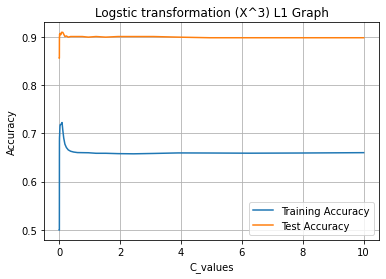

In [173]:
plt.title('Logstic transformation (X^3) L1 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### L1 Graph ransformation (X^3)

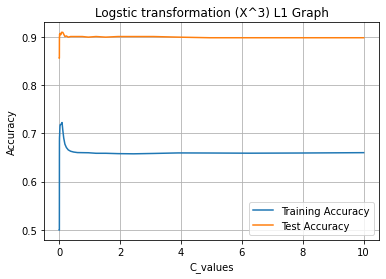

In [174]:
plt.title('Logstic transformation (X^3) L1 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## L2 Regularization

In [175]:
C_values = np.logspace(-4,1,50)
log_train = []
log_test = []
for i in C_values:
    logreg = LogisticRegression(C=i, solver='liblinear', penalty = 'l2')
    logreg.fit(X_train_resampled, y_train_resampled)
    y_hat_logreg = logreg.predict(X_train_resampled)
    acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
    log_train.append(acc_logreg)
    y_hat_logreg_t = logreg.predict(X_val_scaled)
    acc_logreg = logreg.score(X_val_scaled, y_val)
    log_test.append(acc_logreg)

### L2 Data

In [176]:
log_train = np.array(log_train).reshape(-1,1)
log_test = np.array(log_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, log_train, log_test])
df = pd.DataFrame(table, columns =['C Values', 'Training Accuracy', 'Test Accuracy'])
print(df)

     C Values  Training Accuracy  Test Accuracy
0    0.000100           0.698419       0.814907
1    0.000126           0.700441       0.812422
2    0.000160           0.702280       0.812422
3    0.000202           0.704119       0.811180
4    0.000256           0.703567       0.802484
5    0.000324           0.705406       0.800000
6    0.000409           0.708900       0.796273
7    0.000518           0.710739       0.795031
8    0.000655           0.712762       0.791304
9    0.000829           0.714601       0.788820
10   0.001048           0.717175       0.790062
11   0.001326           0.721221       0.790062
12   0.001677           0.723244       0.793789
13   0.002121           0.725818       0.793789
14   0.002683           0.727657       0.797516
15   0.003393           0.732255       0.796273
16   0.004292           0.736116       0.800000
17   0.005429           0.743104       0.801242
18   0.006866           0.748621       0.803727
19   0.008685           0.752299       0

### L2 Graph

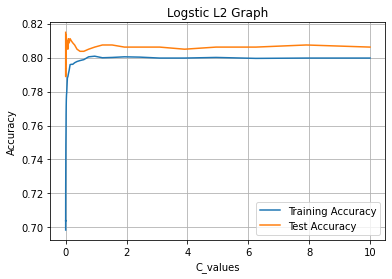

In [177]:
plt.title('Logstic L2 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

 ### L2 Regularization with transformation (X^2)

In [178]:
C_values = np.logspace(-4,1,50)
log_train = []
log_test = []
for i in C_values:
    logreg = LogisticRegression(C=i, solver='liblinear', penalty = 'l2')
    logreg.fit(X_train_resampled**2, y_train_resampled)
    y_hat_logreg = logreg.predict(X_train_resampled)
    acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
    log_train.append(acc_logreg)
    y_hat_logreg_t = logreg.predict(X_val_scaled)
    acc_logreg = logreg.score(X_val_scaled, y_val)
    log_test.append(acc_logreg)

#### L2 ransformation (X^2) Data Display 

In [179]:
log_train = np.array(log_train).reshape(-1,1)
log_test = np.array(log_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, log_train, log_test])
df = pd.DataFrame(table, columns =['C Values', 'Training Accuracy', 'Test Accuracy'])
print(df)

     C Values  Training Accuracy  Test Accuracy
0    0.000100           0.703935       0.824845
1    0.000126           0.707613       0.822360
2    0.000160           0.709820       0.816149
3    0.000202           0.710004       0.809938
4    0.000256           0.713865       0.802484
5    0.000324           0.717727       0.795031
6    0.000409           0.720485       0.792547
7    0.000518           0.722508       0.786335
8    0.000655           0.722876       0.786335
9    0.000829           0.722508       0.786335
10   0.001048           0.724899       0.785093
11   0.001326           0.726554       0.785093
12   0.001677           0.730232       0.785093
13   0.002121           0.733174       0.793789
14   0.002683           0.737587       0.800000
15   0.003393           0.742920       0.804969
16   0.004292           0.748805       0.807453
17   0.005429           0.752666       0.812422
18   0.006866           0.755793       0.816149
19   0.008685           0.760758       0

#### L2 Graph transformation (X^2)

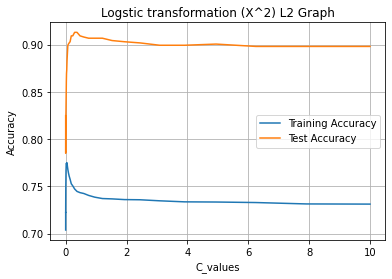

In [180]:
plt.title('Logstic transformation (X^2) L2 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### L2 Regularization with transformation (X^3)

In [181]:
C_values = np.logspace(-5,0,50)
log_train = []
log_test = []
for i in C_values:
    logreg = LogisticRegression(C=i, solver='liblinear', penalty = 'l2')
    logreg.fit(X_train_resampled**3, y_train_resampled)
    y_hat_logreg = logreg.predict(X_train_resampled)
    acc_logreg = logreg.score(X_train_resampled, y_train_resampled)
    log_train.append(acc_logreg)
    y_hat_logreg_t = logreg.predict(X_val_scaled)
    acc_logreg = logreg.score(X_val_scaled, y_val)
    log_test.append(acc_logreg)

#### L2 ransformation (X^3) Data Display

In [182]:
log_train = np.array(log_train).reshape(-1,1)
log_test = np.array(log_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, log_train, log_test])
df = pd.DataFrame(table, columns =['C Values', 'Training Accuracy', 'Test Accuracy'])
print(df)

    C Values  Training Accuracy  Test Accuracy
0   0.000010           0.681684       0.831056
1   0.000013           0.682604       0.831056
2   0.000016           0.682972       0.829814
3   0.000020           0.683156       0.831056
4   0.000026           0.684259       0.831056
5   0.000032           0.685914       0.828571
6   0.000041           0.686650       0.824845
7   0.000052           0.689408       0.823602
8   0.000066           0.695844       0.824845
9   0.000083           0.700441       0.824845
10  0.000105           0.702096       0.818634
11  0.000133           0.706510       0.817391
12  0.000168           0.709820       0.813665
13  0.000212           0.712578       0.807453
14  0.000268           0.715337       0.797516
15  0.000339           0.717911       0.791304
16  0.000429           0.719198       0.786335
17  0.000543           0.720302       0.785093
18  0.000687           0.720485       0.783851
19  0.000869           0.721957       0.781366
20  0.001099 

#### L2 Graph transformation (X^3)

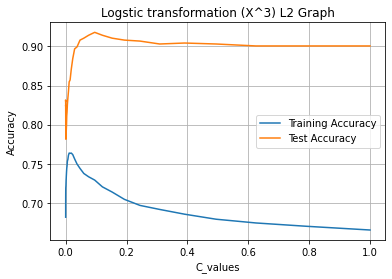

In [183]:
plt.title('Logstic transformation (X^3) L2 Graph')
plt.plot(C_values, log_train, label = "Training Accuracy")
plt.plot(C_values, log_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# SVM

## Without Regularization

### kernel linear

In [186]:
svc = SVC(kernel="linear")
svc.fit(X_train_resampled,y_train_resampled)
y_pred_scv=svc.predict(X_train_resampled)
acc_svc = accuracy_score(y_pred_scv,y_train_resampled)
print("Accuracy on training data = %f" % acc_svc)
y_pred_scv=svc.predict(X_val_scaled)
acc_svc = accuracy_score(y_pred_scv, y_val)
print("Accuracy on test data = %f" % acc_svc)

Accuracy on training data = 0.800478
Accuracy on test data = 0.813665


### kernel rbf 

In [187]:
svc = SVC(kernel="rbf")
svc.fit(X_train_resampled,y_train_resampled)
y_pred_scv=svc.predict(X_train_resampled)
acc_svc = accuracy_score(y_pred_scv,y_train_resampled)
print("Accuracy on training data = %f" % acc_svc)
y_pred_scv=svc.predict(X_val_scaled)
acc_svc = accuracy_score(y_pred_scv, y_val)
print("Accuracy on test data = %f" % acc_svc)

Accuracy on training data = 0.821442
Accuracy on test data = 0.808696


### Model Degress 2 to 10

In [188]:
# Create a classifier: a support vector classifier
svc_train = []
svc_test = []
degrees = [2,3,4,5,6,7,8,9,10]
for i in degrees:
    svc = SVC(kernel="poly", degree=i)
    svc.fit(X_train_resampled,y_train_resampled)
    y_pred_scv=svc.predict(X_train_resampled)
    acc_svc = accuracy_score(y_pred_scv,y_train_resampled)
    svc_train.append(acc_svc)
    y_pred_scv=svc.predict(X_val_scaled)
    acc_svc = accuracy_score(y_pred_scv, y_val)
    svc_test.append(acc_svc)

#### Display Data

In [189]:
svc_train = np.array(svc_train).reshape(-1,1)
svc_test = np.array(svc_test).reshape(-1,1)
degrees = np.array(degrees).reshape(-1,1)
table = np.hstack([degrees, svc_train, svc_test])
df = pd.DataFrame(table, columns =['Degrees', 'Training Accuracy', 'Test Accuracy'])
print(df)

   Degrees  Training Accuracy  Test Accuracy
0      2.0           0.815741       0.803727
1      3.0           0.827326       0.809938
2      4.0           0.855645       0.798758
3      5.0           0.881758       0.818634
4      6.0           0.905664       0.818634
5      7.0           0.929386       0.811180
6      8.0           0.949798       0.798758
7      9.0           0.962118       0.798758
8     10.0           0.974071       0.791304


#### Graph Data

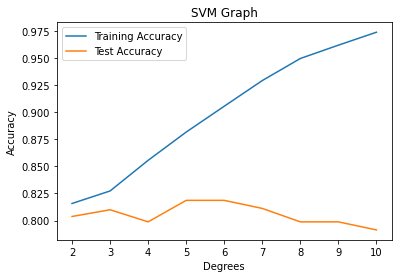

In [190]:
plt.title('SVM Graph')
plt.plot(degrees, svc_train, label = "Training Accuracy")
plt.plot(degrees, svc_test, label = "Test Accuracy")
plt.xlabel('Degrees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## L2 Regularization

### Linear Model

In [191]:
C_values = np.logspace(-5,1,10)
svc_train = []
svc_test = []
for i in C_values:
    svc = SVC(kernel="linear", C=i)
    svc.fit(X_train_resampled,y_train_resampled)
    y_pred_scv=svc.predict(X_train_resampled)
    acc_svc = accuracy_score(y_pred_scv,y_train_resampled)
    svc_train.append(acc_svc)
    y_pred_scv=svc.predict(X_val_scaled)
    acc_svc = accuracy_score(y_pred_scv, y_val)
    svc_test.append(acc_svc)

#### Display Data

In [192]:
svc_train = np.array(svc_train).reshape(-1,1)
svc_test = np.array(svc_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, svc_train, svc_test])
df = pd.DataFrame(table, columns =['C values', 'Training Accuracy', 'Test Accuracy'])
print(df)

    C values  Training Accuracy  Test Accuracy
0   0.000010           0.660537       0.844720
1   0.000046           0.660537       0.844720
2   0.000215           0.660537       0.844720
3   0.001000           0.691431       0.826087
4   0.004642           0.755793       0.823602
5   0.021544           0.789812       0.812422
6   0.100000           0.796616       0.816149
7   0.464159           0.799926       0.812422
8   2.154435           0.801581       0.811180
9  10.000000           0.801030       0.812422


#### Plot Data

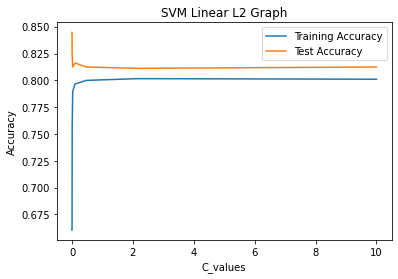

In [193]:
plt.title('SVM Linear L2 Graph')
plt.plot(C_values, svc_train, label = "Training Accuracy")
plt.plot(C_values, svc_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### RBF

In [194]:
C_values = np.logspace(-5,1,10)
svc_train = []
svc_test = []
for i in C_values:
    svc = SVC(kernel = "rbf", C=i)
    svc.fit(X_train_resampled,y_train_resampled)
    y_pred_scv=svc.predict(X_train_resampled)
    acc_svc = accuracy_score(y_pred_scv,y_train_resampled)
    svc_train.append(acc_svc)
    y_pred_scv=svc.predict(X_val_scaled)
    acc_svc = accuracy_score(y_pred_scv, y_val)
    svc_test.append(acc_svc)

#### Display Data

In [195]:
svc_train = np.array(svc_train).reshape(-1,1)
svc_test = np.array(svc_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, svc_train, svc_test])
df = pd.DataFrame(table, columns =['C values', 'Training Accuracy', 'Test Accuracy'])
print(df)

    C values  Training Accuracy  Test Accuracy
0   0.000010           0.703751       0.788820
1   0.000046           0.703751       0.788820
2   0.000215           0.703751       0.788820
3   0.001000           0.703751       0.788820
4   0.004642           0.718279       0.773913
5   0.021544           0.759838       0.798758
6   0.100000           0.793306       0.803727
7   0.464159           0.817396       0.813665
8   2.154435           0.830268       0.817391
9  10.000000           0.859507       0.811180


#### Plot Data

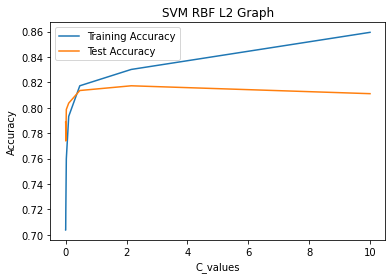

In [196]:
plt.title('SVM RBF L2 Graph')
plt.plot(C_values, svc_train, label = "Training Accuracy")
plt.plot(C_values, svc_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Degree 5

In [197]:
C_values = np.logspace(-6,-1,10)
svc_train = []
svc_test = []
for i in C_values:
    svc = SVC(kernel = "poly",degree = 5, C=i)
    svc.fit(X_train_resampled,y_train_resampled)
    y_pred_scv=svc.predict(X_train_resampled)
    acc_svc = accuracy_score(y_pred_scv,y_train_resampled)
    svc_train.append(acc_svc)
    y_pred_scv=svc.predict(X_val_scaled)
    acc_svc = accuracy_score(y_pred_scv, y_val)
    svc_test.append(acc_svc)

#### Display Data

In [198]:
svc_train = np.array(svc_train).reshape(-1,1)
svc_test = np.array(svc_test).reshape(-1,1)
C_values = np.array(C_values).reshape(-1,1)
table = np.hstack([C_values, svc_train, svc_test])
df = pd.DataFrame(table, columns =['C values', 'Training Accuracy', 'Test Accuracy'])
print(df)

   C values  Training Accuracy  Test Accuracy
0  0.000001           0.570430       0.845963
1  0.000004           0.570430       0.845963
2  0.000013           0.657227       0.832298
3  0.000046           0.729864       0.768944
4  0.000167           0.759838       0.751553
5  0.000599           0.781905       0.765217
6  0.002154           0.801765       0.786335
7  0.007743           0.814086       0.802484
8  0.027826           0.829717       0.808696
9  0.100000           0.847554       0.804969


#### Plot Data

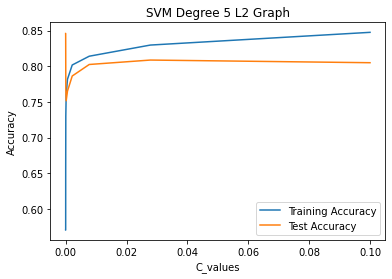

In [199]:
plt.title('SVM Degree 5 L2 Graph')
plt.plot(C_values, svc_train, label = "Training Accuracy")
plt.plot(C_values, svc_test, label = "Test Accuracy")
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Neural Networks


##Without Regularization

### Relu

#### Relu 1 hidden layer 

In [71]:
nodesList =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [78]:
reluH1= []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = keras.optimizers.Adam(lr=0.01)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  reluH1.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7789
Node number 1 Accuracy: 77.89
26/26 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8149
Node number 2 Accuracy: 81.49
26/26 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.7851
Node number 3 Accuracy: 78.51
26/26 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8012
Node number 4 Accuracy: 80.12
26/26 [==============================] - 0s 7ms/step - loss: 0.4090 - accuracy: 0.8075
Node number 5 Accuracy: 80.75
26/26 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8248
Node number 6 Accuracy: 82.48
26/26 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8050
Node number 7 Accuracy: 80.50
26/26 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8211
Node number 8 Accuracy: 82.11
26/26 [==============================] - 0s 2ms/step - loss: 0.4

#### Relu 2 hidden layer

In [79]:
reluH2= []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='relu'))
  model.add(Dense(i, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  reluH2.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.8559
Node number 1 Accuracy: 85.59
26/26 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8099
Node number 2 Accuracy: 80.99
26/26 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8062
Node number 3 Accuracy: 80.62
26/26 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7950
Node number 4 Accuracy: 79.50
26/26 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8124
Node number 5 Accuracy: 81.24
26/26 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7764
Node number 6 Accuracy: 77.64
26/26 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7876
Node number 7 Accuracy: 78.76
26/26 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.7888
Node number 8 Accuracy: 78.88
26/26 [==============================] - 0s 3ms/step - loss: 0.4

#### Relu 3 hidden layer

In [80]:
reluH3=[]
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='relu'))
  model.add(Dense(i, activation='relu'))
  model.add(Dense(i, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  reluH3.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))



26/26 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.8559
Node number 1 Accuracy: 85.59
26/26 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7652
Node number 2 Accuracy: 76.52
26/26 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8174
Node number 3 Accuracy: 81.74
26/26 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7925
Node number 4 Accuracy: 79.25
26/26 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.7764
Node number 5 Accuracy: 77.64
26/26 [==============================] - 1s 9ms/step - loss: 0.4535 - accuracy: 0.7776
Node number 6 Accuracy: 77.76
26/26 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.7826
Node number 7 Accuracy: 78.26
26/26 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.7826
Node number 8 Accuracy: 78.26
26/26 [==============================] - 0s 3ms/step - loss: 0.4

#### Relu 4 hidden layer 

In [81]:
reluH4=[]
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='relu'))
  model.add(Dense(i, activation='relu'))
  model.add(Dense(i, activation='relu'))
  model.add(Dense(i, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  reluH4.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.8559
Node number 1 Accuracy: 85.59
26/26 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.1441
Node number 2 Accuracy: 14.41
26/26 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8286
Node number 3 Accuracy: 82.86
26/26 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8484
Node number 4 Accuracy: 84.84
26/26 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.7975
Node number 5 Accuracy: 79.75
26/26 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8335
Node number 6 Accuracy: 83.35
26/26 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8509
Node number 7 Accuracy: 85.09
26/26 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8360
Node number 8 Accuracy: 83.60
26/26 [==============================] - 0s 3ms/step - loss: 0.3

### Sigmoid

#### Sigmoid 1 hidden layer 

In [82]:
sigmoidH1=[]
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  sigmoidH1.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8112
Node number 1 Accuracy: 81.12
26/26 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8224
Node number 2 Accuracy: 82.24
26/26 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8037
Node number 3 Accuracy: 80.37
26/26 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8149
Node number 4 Accuracy: 81.49
26/26 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8236
Node number 5 Accuracy: 82.36
26/26 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8099
Node number 6 Accuracy: 80.99
26/26 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8174
Node number 7 Accuracy: 81.74
26/26 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.8099
Node number 8 Accuracy: 80.99
26/26 [==============================] - 0s 2ms/step - loss: 0.3

#### Sigmod 2 hidden layer

In [83]:
sigmoidH2 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='sigmoid'))
  model.add(Dense(i, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  sigmoidH2.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8286
Node number 1 Accuracy: 82.86
26/26 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8062
Node number 2 Accuracy: 80.62
26/26 [==============================] - 0s 5ms/step - loss: 0.4076 - accuracy: 0.8199
Node number 3 Accuracy: 81.99
26/26 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8012
Node number 4 Accuracy: 80.12
26/26 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8149
Node number 5 Accuracy: 81.49
26/26 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8037
Node number 6 Accuracy: 80.37
26/26 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8112
Node number 7 Accuracy: 81.12
26/26 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8161
Node number 8 Accuracy: 81.61
26/26 [==============================] - 0s 2ms/step - loss: 0.3

#### Sigmod 3 hidden layer

In [84]:
sigmoidH3 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='sigmoid'))
  model.add(Dense(i, activation='sigmoid'))
  model.add(Dense(i, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  sigmoidH3.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8161
Node number 1 Accuracy: 81.61
26/26 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8186
Node number 2 Accuracy: 81.86
26/26 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8000
Node number 3 Accuracy: 80.00
26/26 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8112
Node number 4 Accuracy: 81.12
26/26 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7876
Node number 5 Accuracy: 78.76
26/26 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8311
Node number 6 Accuracy: 83.11
26/26 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8012
Node number 7 Accuracy: 80.12
26/26 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8236
Node number 8 Accuracy: 82.36
26/26 [==============================] - 0s 2ms/step - loss: 0.4

#### Sigmod 4 hidden layer

In [85]:
sigmoidH4 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='sigmoid'))
  model.add(Dense(i, activation='sigmoid'))
  model.add(Dense(i, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  sigmoidH4.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8273
Node number 1 Accuracy: 82.73
26/26 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8261
Node number 2 Accuracy: 82.61
26/26 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8298
Node number 3 Accuracy: 82.98
26/26 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.8000
Node number 4 Accuracy: 80.00
26/26 [==============================] - 0s 6ms/step - loss: 0.4191 - accuracy: 0.8174
Node number 5 Accuracy: 81.74
26/26 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8273
Node number 6 Accuracy: 82.73
26/26 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8298
Node number 7 Accuracy: 82.98
26/26 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8348
Node number 8 Accuracy: 83.48
26/26 [==============================] - 0s 2ms/step - loss: 0.4

### Tanh

#### Tanh 1 hidden layer

In [86]:
tanhH1 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  tanhH1.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8161
Node number 1 Accuracy: 81.61
26/26 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7963
Node number 2 Accuracy: 79.63
26/26 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8124
Node number 3 Accuracy: 81.24
26/26 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8050
Node number 4 Accuracy: 80.50
26/26 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8112
Node number 5 Accuracy: 81.12
26/26 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8050
Node number 6 Accuracy: 80.50
26/26 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8211
Node number 7 Accuracy: 82.11
26/26 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.8112
Node number 8 Accuracy: 81.12
26/26 [==============================] - 0s 2ms/step - loss: 0.3

#### Tanh 2 hidden layer

In [87]:
tanhH2 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='tanh'))
  model.add(Dense(i, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  tanhH2.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8211
Node number 1 Accuracy: 82.11
26/26 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7627
Node number 2 Accuracy: 76.27
26/26 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8112
Node number 3 Accuracy: 81.12
26/26 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8149
Node number 4 Accuracy: 81.49
26/26 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8311
Node number 5 Accuracy: 83.11
26/26 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8211
Node number 6 Accuracy: 82.11
26/26 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8335
Node number 7 Accuracy: 83.35
26/26 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8112
Node number 8 Accuracy: 81.12
26/26 [==============================] - 0s 2ms/step - loss: 0.4

#### Tanh 3 hidden layer

In [88]:
tanhH3 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='sigmoid'))
  model.add(Dense(i, activation='tanh'))
  model.add(Dense(i, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  tanhH3.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7975
Node number 1 Accuracy: 79.75
26/26 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8335
Node number 2 Accuracy: 83.35
26/26 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8000
Node number 3 Accuracy: 80.00
26/26 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8335
Node number 4 Accuracy: 83.35
26/26 [==============================] - 0s 5ms/step - loss: 0.4078 - accuracy: 0.8161
Node number 5 Accuracy: 81.61
26/26 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8062
Node number 6 Accuracy: 80.62
26/26 [==============================] - 1s 2ms/step - loss: 0.3831 - accuracy: 0.8261
Node number 7 Accuracy: 82.61
26/26 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.7925
Node number 8 Accuracy: 79.25
26/26 [==============================] - 1s 8ms/step - loss: 0.4

#### Tanh 4 hidden layer

In [89]:
tanhH4 = []
for i in range(1,11):
  model = Sequential()
  model.add(Dense(i, input_shape=(15,), activation='sigmoid'))
  model.add(Dense(i, activation='tanh'))
  model.add(Dense(i, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  tanhH4.append(accuracy)
  print('Node number {:d} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8286
Node number 1 Accuracy: 82.86
26/26 [==============================] - 1s 5ms/step - loss: 0.3874 - accuracy: 0.8273
Node number 2 Accuracy: 82.73
26/26 [==============================] - 1s 5ms/step - loss: 0.4117 - accuracy: 0.8075
Node number 3 Accuracy: 80.75
26/26 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8286
Node number 4 Accuracy: 82.86
26/26 [==============================] - 0s 5ms/step - loss: 0.4259 - accuracy: 0.8025
Node number 5 Accuracy: 80.25
26/26 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.7963
Node number 6 Accuracy: 79.63
26/26 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8373
Node number 7 Accuracy: 83.73
26/26 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.7963
Node number 8 Accuracy: 79.63
26/26 [==============================] - 0s 2ms/step - loss: 0.3

### Display Data

In [105]:
nodesList = np.array(nodesList).reshape(-1,1)
reluH1 = np.array(reluH1).reshape(-1,1)
reluH2 = np.array(reluH2).reshape(-1,1)
reluH3 = np.array(reluH3).reshape(-1,1)
reluH4 = np.array(reluH4).reshape(-1,1)
sigmoidH1= np.array(sigmoidH1).reshape(-1,1)
sigmoidH2 = np.array(sigmoidH2).reshape(-1,1)
sigmoidH3 = np.array(sigmoidH3).reshape(-1,1)
sigmoidH4 = np.array(sigmoidH4).reshape(-1,1)
tanhH1 = np.array(tanhH1).reshape(-1,1)
tanhH2 = np.array(tanhH2).reshape(-1,1)
tanhH3= np.array(tanhH3).reshape(-1,1)
tanhH4= np.array(tanhH4).reshape(-1,1)

table1 = np.hstack([nodesList,reluH1 ,reluH2, reluH3,reluH4])
table1 = np.hstack([nodesList,sigmoidH1,sigmoidH2,sigmoidH3,sigmoidH4])
table2 = np.hstack([nodesList,tanhH2, tanhH3, tanhH4]) 
df1 = pd.DataFrame(table1, columns =['nodes', 'relu 1', 'relu 2','relu 3','relu 4'])
df2 = pd.DataFrame(table1, columns =['nodes','sigmoid 1','sigmoid 2','sigmoid 3','sigmoid 4' ])
df3 = pd.DataFrame(table1, columns =['nodes','tanh 1','tanh 2','tanh 3','tanh 4' ])
print(df1)
print(df2)
print(df3)

   nodes    relu 1    relu 2    relu 3    relu 4
0    1.0  0.811180  0.828571  0.816149  0.827329
1    2.0  0.822360  0.806211  0.818634  0.826087
2    3.0  0.803727  0.819876  0.800000  0.829814
3    4.0  0.814907  0.801242  0.811180  0.800000
4    5.0  0.823602  0.814907  0.787578  0.817391
5    6.0  0.809938  0.803727  0.831056  0.827329
6    7.0  0.817391  0.811180  0.801242  0.829814
7    8.0  0.809938  0.816149  0.823602  0.834783
8    9.0  0.826087  0.829814  0.782609  0.808696
9   10.0  0.822360  0.808696  0.793789  0.833540
   nodes  sigmoid 1  sigmoid 2  sigmoid 3  sigmoid 4
0    1.0   0.811180   0.828571   0.816149   0.827329
1    2.0   0.822360   0.806211   0.818634   0.826087
2    3.0   0.803727   0.819876   0.800000   0.829814
3    4.0   0.814907   0.801242   0.811180   0.800000
4    5.0   0.823602   0.814907   0.787578   0.817391
5    6.0   0.809938   0.803727   0.831056   0.827329
6    7.0   0.817391   0.811180   0.801242   0.829814
7    8.0   0.809938   0.816149   0.82

### Plot Accuracy

#### Relu Graph

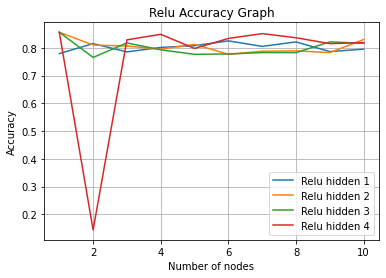

In [91]:
plt.title('Relu Accuracy Graph')
plt.plot(nodesList,reluH1, label = "Relu hidden 1")
plt.plot(nodesList,reluH2, label = "Relu hidden 2")
plt.plot(nodesList,reluH3, label = "Relu hidden 3")
plt.plot(nodesList,reluH4, label = "Relu hidden 4")
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Sigmoid Graph

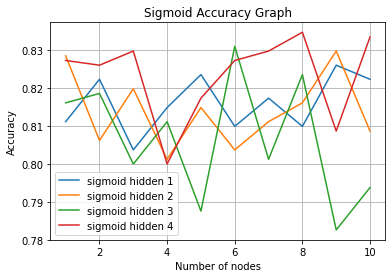

In [92]:
plt.title('Sigmoid Accuracy Graph')
plt.plot(nodesList,sigmoidH1, label = "sigmoid hidden 1")
plt.plot(nodesList,sigmoidH2, label = "sigmoid hidden 2")
plt.plot(nodesList,sigmoidH3, label = "sigmoid hidden 3")
plt.plot(nodesList,sigmoidH4, label = "sigmoid hidden 4")
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Tanh Graph

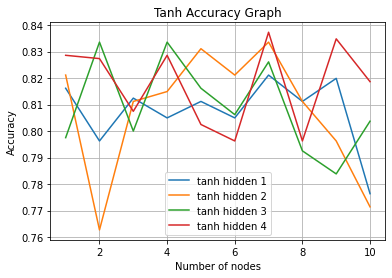

In [93]:
plt.title('Tanh Accuracy Graph')
plt.plot(nodesList,tanhH1, label = "tanh hidden 1")
plt.plot(nodesList,tanhH2, label = "tanh hidden 2")
plt.plot(nodesList,tanhH3, label = "tanh hidden 3")
plt.plot(nodesList,tanhH4, label = "tanh hidden 4")
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

##L1 Regularization

In [95]:
lambda1=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02]

In [96]:
L1Reg = []
for i in lambda1:
  model = Sequential()
  model.add(Dense(7, input_shape=(15,), activation='relu', activity_regularizer=l1(i)))
  model.add(Dense(7, activation='relu', activity_regularizer=l1(i)))
  model.add(Dense(7, activation='relu', activity_regularizer=l1(i)))
  model.add(Dense(7, activation='relu', activity_regularizer=l1(i)))
  model.add(Dense(1, activation='sigmoid', activity_regularizer=l1(i)))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  L1Reg.append(accuracy)
  print('Lambda number {:.3f} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8124
Node number 0.001 Accuracy: 81.24
26/26 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8348
Node number 0.002 Accuracy: 83.48
26/26 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8286
Node number 0.003 Accuracy: 82.86
26/26 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8522
Node number 0.004 Accuracy: 85.22
26/26 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8398
Node number 0.005 Accuracy: 83.98
26/26 [==============================] - 1s 5ms/step - loss: 0.4701 - accuracy: 0.8025
Node number 0.006 Accuracy: 80.25
26/26 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8124
Node number 0.007 Accuracy: 81.24
26/26 [==============================] - 1s 3ms/step - loss: 0.4890 - accuracy: 0.7975
Node number 0.008 Accuracy: 79.75
26/26 [=========================

### Plot Data

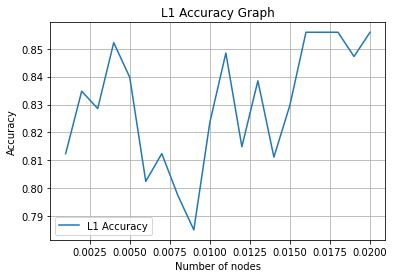

In [97]:
plt.title('L1 Accuracy Graph')
plt.plot(lambda1,L1Reg, label = "L1 Accuracy")
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

##L2 Regularization

In [98]:
L2Reg = []
for i in lambda1:
  model = Sequential()
  model.add(Dense(7, input_shape=(15,), activation='relu', activity_regularizer=l2(i)))
  model.add(Dense(7, activation='relu', activity_regularizer=l2(i)))
  model.add(Dense(7, activation='relu', activity_regularizer=l2(i)))
  model.add(Dense(7, activation='relu', activity_regularizer=l2(i)))
  model.add(Dense(1, activation='sigmoid', activity_regularizer=l2(i)))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32,verbose=0)
  _,accuracy = model.evaluate(X_val_scaled,y_val)
  L2Reg.append(accuracy)
  print('Lambda number {:.3f} Accuracy: {:.2f}'.format(i,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8596
Lambda number 0.001 Accuracy: 85.96
26/26 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8286
Lambda number 0.002 Accuracy: 82.86
26/26 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8472
Lambda number 0.003 Accuracy: 84.72
26/26 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8323
Lambda number 0.004 Accuracy: 83.23
26/26 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8323
Lambda number 0.005 Accuracy: 83.23
26/26 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8000
Lambda number 0.006 Accuracy: 80.00
26/26 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7975
Lambda number 0.007 Accuracy: 79.75
26/26 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7727
Lambda number 0.008 Accuracy: 77.27
26/26 [=========

### L2 Plot Data

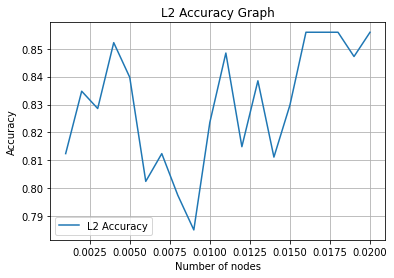

In [102]:
plt.title('L2 Accuracy Graph')
plt.plot(lambda1,L1Reg, label = "L2 Accuracy")
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## L1 VS L2 Data

In [101]:
lambda1 = np.array(lambda1).reshape(-1,1)
L1Reg = np.array(L1Reg).reshape(-1,1)
L2Reg = np.array(L2Reg).reshape(-1,1)
table = np.hstack([lambda1,L1Reg,L2Reg])

df = pd.DataFrame(table, columns =['lambda', 'L1', 'L2' ])
print(df)

    lambda        L1        L2
0    0.001  0.812422  0.859627
1    0.002  0.834783  0.828571
2    0.003  0.828571  0.847205
3    0.004  0.852174  0.832298
4    0.005  0.839752  0.832298
5    0.006  0.802484  0.800000
6    0.007  0.812422  0.797516
7    0.008  0.797516  0.772671
8    0.009  0.785093  0.811180
9    0.010  0.823602  0.848447
10   0.011  0.848447  0.842236
11   0.012  0.814907  0.848447
12   0.013  0.838509  0.790062
13   0.014  0.811180  0.821118
14   0.015  0.829814  0.853416
15   0.016  0.855901  0.865839
16   0.017  0.855901  0.847205
17   0.018  0.855901  0.797516
18   0.019  0.847205  0.855901
19   0.020  0.855901  0.870807


## PCA

In [103]:

model = Sequential()
model.add(Dense(7, input_shape=(15,), activation='relu', activity_regularizer=l2(0.020)))
model.add(Dense(7, activation='relu', activity_regularizer=l2(0.020)))
model.add(Dense(7, activation='relu', activity_regularizer=l2(0.020)))
model.add(Dense(7, activation='relu', activity_regularizer=l2(0.020)))
model.add(Dense(1, activation='sigmoid', activity_regularizer=l2(0.020)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=150, batch_size=32,verbose=0)
_,accuracy = model.evaluate(X_val_pca,y_val)
print('Node number {:.3f} Accuracy: {:.2f}'.format(0.005,accuracy*100))

26/26 [==============================] - 0s 2ms/step - loss: 1.6929 - accuracy: 0.3429
Node number 0.005 Accuracy: 34.29
